# Validate and register RxRx2 metadata

In this notebook, we'll take a look at how to validate and register metadata.

We will combine metadata and deep learning embeddings into an `AnnData` object.

In [1]:
import lamindb as ln
import lnschema_bionty as lb
import lnschema_lamin1 as ln1
import anndata as ad

💡 loaded instance: laminlabs/rxrx (lamindb 0.55.1)


In [2]:
ln.settings.verbosity = "hint"

In [3]:
ln.track()

💡 notebook imports: anndata==0.9.1 lamindb==0.55.0 lnschema_bionty==0.31.1 lnschema_lamin1==0.23.2
✅ saved: Transform(id='Znl9AYOyfjZ5z8', name='Validate and register RxRx2 metadata', short_name='03-meta-rxrx2', version='0', type=notebook, updated_at=2023-10-06 13:22:24, created_by_id='kmvZDIX9')
✅ saved: Run(id='2wSBhmJ8xBb2oalLAyYy', run_at=2023-10-06 13:22:24, transform_id='Znl9AYOyfjZ5z8', created_by_id='kmvZDIX9')


## Load metadata

We read in the metadata of the wells:

In [4]:
meta_file = ln.File.filter(key="rxrx2/metadata.csv").one()
meta = meta_file.load()

💡 adding file 41t7qU3UgGYQIusqWfHR as input for run 2wSBhmJ8xBb2oalLAyYy, adding parent transform VxfLdk7rOTnbz8
... downloading metadata.csv: 1.00


In [5]:
meta.head()

,site_id,well_id,cell_type,experiment,plate,well,site,treatment,treatment_conc
0,HUVEC-1_1_AA03_1,HUVEC-1_1_AA03,HUVEC,HUVEC-1,1,AA03,1,Sonic-Hedgehog,0.1
1,HUVEC-1_1_AA03_2,HUVEC-1_1_AA03,HUVEC,HUVEC-1,1,AA03,2,Sonic-Hedgehog,0.1
2,HUVEC-1_1_AA03_3,HUVEC-1_1_AA03,HUVEC,HUVEC-1,1,AA03,3,Sonic-Hedgehog,0.1
3,HUVEC-1_1_AA03_4,HUVEC-1_1_AA03,HUVEC,HUVEC-1,1,AA03,4,Sonic-Hedgehog,0.1
4,HUVEC-1_1_AA04_1,HUVEC-1_1_AA04,HUVEC,HUVEC-1,1,AA04,1,GDF-1,0.1


In [6]:
meta["plate"] = meta["plate"].astype(str)
meta["site"] = meta["site"].astype(str)

In [7]:
meta.shape

(131953, 9)

Add a `file_keys` column:

In [8]:
# get the 6 file keys for each row
files_list = []
for _, row in meta.iterrows():
    well = row.well
    site = row.site
    # each image has 6 channels
    files_list.append(
        f"images/{row.experiment}/Plate{row.plate}/{well}_s{site}_w1-w6.png"
    )  # channels are w1 - w6
meta["file_keys"] = files_list

In [9]:
meta.head(2)

,site_id,well_id,cell_type,experiment,plate,well,site,treatment,treatment_conc,file_keys
0,HUVEC-1_1_AA03_1,HUVEC-1_1_AA03,HUVEC,HUVEC-1,1,AA03,1,Sonic-Hedgehog,0.1,images/HUVEC-1/Plate1/AA03_s1_w1-w6.png
1,HUVEC-1_1_AA03_2,HUVEC-1_1_AA03,HUVEC,HUVEC-1,1,AA03,2,Sonic-Hedgehog,0.1,images/HUVEC-1/Plate1/AA03_s2_w1-w6.png


## Load embeddings

In [10]:
embedding_file = ln.File.filter(key="rxrx2/embeddings.csv").one()

In [11]:
embedding = embedding_file.load()
embedding.set_index("site_id", inplace=True)

💡 adding file D5LO4LSh94YdIiiRMU11 as input for run 2wSBhmJ8xBb2oalLAyYy, adding parent transform VxfLdk7rOTnbz8
... downloading embeddings.csv: 1.00


In [12]:
embedding.shape

(131953, 128)

In [13]:
embedding.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127
site_id,,,,,,,,,,,,,,,,,,,,,
HUVEC-1_1_AA03_1,-0.316918,-0.680636,0.808178,-0.137503,-0.947040,-2.796024,-1.386294,-2.541984,-0.036722,-0.150445,...,0.044025,0.136659,-2.087172,2.860377,0.231014,0.338580,-0.504502,-1.992612,-1.328181,0.587981
HUVEC-1_1_AA03_2,0.914670,-0.009687,1.157437,0.448207,-0.546811,-1.792279,-1.283470,-1.500057,0.508764,0.650537,...,0.508053,0.828908,-2.586799,1.503782,-0.482412,0.894832,-1.406880,-1.567457,-1.237937,0.967158
HUVEC-1_1_AA03_3,0.384831,-0.630163,0.844492,0.078680,-1.497208,-3.127449,-0.617015,-1.984535,-0.062243,0.173309,...,-1.566359,0.798682,-2.241158,2.297683,0.340067,-0.032073,-0.765850,-1.615617,-2.184443,0.673777
HUVEC-1_1_AA03_4,0.733473,-0.329016,1.319193,0.433355,-0.801268,-2.489902,-0.668106,-1.722575,-0.463873,1.059009,...,-0.313790,0.446107,-2.883605,1.824921,-0.252444,-0.125901,-1.181341,-1.027408,-1.475612,0.640989
HUVEC-1_1_AA04_1,0.512833,0.402055,1.318915,-1.067507,-2.031572,-1.260452,-1.287148,-2.538712,-0.367633,0.019258,...,-0.584362,-0.101393,-2.937795,2.197699,-0.537146,0.019088,-0.495586,-1.710877,-2.491404,0.924014


## Validate and register metadata

### `cell_type`

We can start with curating the metadata table based on the ontologies from bionty. For example, let's start with the `cell_line` metadata.
In this table, they are called "cell_type" but they are in fact the cell line for the experiments

In [14]:
meta["cell_type"].unique()

array(['HUVEC'], dtype=object)

In [15]:
cell_lines = lb.CellLine.from_values(meta["cell_type"])

✅ loaded 1 CellLine record matching synonyms: 'HUVEC'


### `experiment`

In [16]:
meta["experiment"].unique()

array(['HUVEC-1', 'HUVEC-2'], dtype=object)

In [17]:
experiments = []
for name in meta["experiment"].unique():
    record = ln1.Experiment(name=name, description="RxRx2")
    experiments.append(record)

ln.save(experiments)

❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
HUVEC-01,HFbd3rgo,93.333333
HUVEC-15,vu42qBWS,93.333333
HUVEC-10,MZvYUaHD,93.333333
HUVEC-12,iNPQP848,93.333333
HUVEC-13,faenQhTV,93.333333
HUVEC-14,46ee0ikz,93.333333
HUVEC-11,7fu8Hes9,93.333333
HUVEC-16,f7BOPYDk,93.333333
HUVEC-17,Svl4v1Hc,93.333333


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
HUVEC-24,NZSwVwwk,93.333333
HUVEC-22,TZ0zo4Cg,93.333333
HUVEC-21,CFQntY2f,93.333333
HUVEC-20,7dzyFjKf,93.333333
HUVEC-12,iNPQP848,93.333333
HUVEC-02,c8tfCsVQ,93.333333
HUVEC-23,VVWChtJd,93.333333


In [18]:
experiments

[Experiment(id='ipTPnFPo', name='HUVEC-1', description='RxRx2', updated_at=2023-10-06 13:22:52, created_by_id='kmvZDIX9'),
 Experiment(id='JS5pZgJ3', name='HUVEC-2', description='RxRx2', updated_at=2023-10-06 13:22:52, created_by_id='kmvZDIX9')]

### `plate`

In [19]:
meta["plate"].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'],
      dtype=object)

In [20]:
is_plate = ln.ULabel.filter(name="is_plate").one()

In [21]:
plates = []
for name in meta["plate"].unique():
    record = ln.ULabel(name=f"Plate{name}")
    plates.append(record)

ln.save(plates)
is_plate.children.set(plates)

✅ loaded ULabel record with exact same name: 'Plate1'
✅ loaded ULabel record with exact same name: 'Plate2'


✅ loaded ULabel record with exact same name: 'Plate3'
✅ loaded ULabel record with exact same name: 'Plate4'
❗ record with similar name exist! did you mean to load it?


,id,__ratio__
name,,
Plate1,ISKv1Vk1,92.307692


❗ record with similar name exist! did you mean to load it?


,id,__ratio__
name,,
Plate1,ISKv1Vk1,92.307692


❗ records with similar names exist! did you mean to load one of them?


,id,__ratio__
name,,
Plate1,ISKv1Vk1,92.307692
Plate2,Uq6YHvJR,92.307692


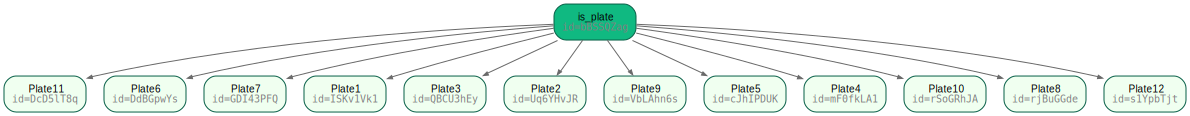

In [22]:
is_plate.view_parents(with_children=True)

### `well`

We might also want to add the well information, so that we can link image files and parse images based on well coordinates. To do this, let's first extract well locations from the table:

In [23]:
meta["well"].unique()

array(['AA03', 'AA04', 'AA05', ..., 'G10', 'I45', 'J02'], dtype=object)

In [24]:
wells = []
for well in meta["well"].unique():
    if len(well) == 3:
        row = well[0]
        col = int(well[1:])
    elif len(well) == 4:
        row = well[:2]
        col = int(well[2:])
    else:
        raise AssertionError
    wells.append(ln1.Well(name=well, row=row, column=col))

ln.save(wells)

✅ loaded Well record with exact same name: 'B02'
✅ loaded Well record with exact same name: 'B03'
✅ loaded Well record with exact same name: 'B04'
✅ loaded Well record with exact same name: 'B05'
✅ loaded Well record with exact same name: 'B06'
✅ loaded Well record with exact same name: 'B07'
✅ loaded Well record with exact same name: 'B08'
✅ loaded Well record with exact same name: 'B09'
✅ loaded Well record with exact same name: 'B10'
✅ loaded Well record with exact same name: 'B11'
✅ loaded Well record with exact same name: 'B12'
✅ loaded Well record with exact same name: 'B13'
✅ loaded Well record with exact same name: 'B14'
✅ loaded Well record with exact same name: 'B15'
✅ loaded Well record with exact same name: 'B16'
✅ loaded Well record with exact same name: 'B17'
✅ loaded Well record with exact same name: 'B18'
✅ loaded Well record with exact same name: 'B19'
✅ loaded Well record with exact same name: 'B20'
✅ loaded Well record with exact same name: 'B21'
✅ loaded Well record

### `site`

In [25]:
meta["site"].unique()

array(['1', '2', '3', '4'], dtype=object)

In [26]:
is_site = ln.ULabel.filter(name="is_site").one()

In [27]:
sites = []
for name in meta["site"].unique():
    record = ln.ULabel(name=f"Site{name}")
    sites.append(record)

ln.save(sites)
is_site.children.set(sites)

✅ loaded ULabel record with exact same name: 'Site1'
✅ loaded ULabel record with exact same name: 'Site2'


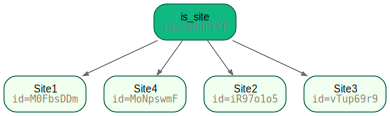

In [28]:
is_site.view_parents(with_children=True)

### `treatment`

In [29]:
treatments = []
for treatment in meta["treatment"].unique():
    record = ln1.Treatment(
        name=treatment,
        type="chemical",
        system="soluble factor",
    )
    treatments.append(record)

ln.save(treatments)

✅ loaded Treatment record with exact same name: 'EMPTY'


### assay/readout

We can do the same for other ontologies that we are interested to curate. For example, the type of readout. We are going to choose the "high content screen" readout.

In [30]:
assay = lb.ExperimentalFactor.filter(name="high content screen").one()

### features

In [31]:
var_features = ln.Feature.from_df(embedding)
ln.save(var_features)

In [32]:
obs_features = ln.Feature.from_df(meta)
ln.save(obs_features)

In [33]:
features = ln.Feature.lookup()

## Register metadata-file_keys as a parquet file:

Here we create a DataFrame with each row as a single image, similar to a link table but with multiple metadata columns:

In [34]:
meta_filekey = meta.copy()

In [35]:
keys_list = []
for key in meta_filekey["file_keys"]:
    keys = [key.replace("w1-w6.png", f"w{str(channel)}.png") for channel in range(1, 7)]
    keys_list.append(keys)

In [36]:
meta_filekey["file_keys"] = keys_list

In [37]:
meta_filekey = meta_filekey.explode("file_keys").reset_index(drop=True)

In [38]:
meta_filekey

,site_id,well_id,cell_type,experiment,plate,well,site,treatment,treatment_conc,file_keys
0,HUVEC-1_1_AA03_1,HUVEC-1_1_AA03,HUVEC,HUVEC-1,1,AA03,1,Sonic-Hedgehog,0.100000,images/HUVEC-1/Plate1/AA03_s1_w1.png
1,HUVEC-1_1_AA03_1,HUVEC-1_1_AA03,HUVEC,HUVEC-1,1,AA03,1,Sonic-Hedgehog,0.100000,images/HUVEC-1/Plate1/AA03_s1_w2.png
2,HUVEC-1_1_AA03_1,HUVEC-1_1_AA03,HUVEC,HUVEC-1,1,AA03,1,Sonic-Hedgehog,0.100000,images/HUVEC-1/Plate1/AA03_s1_w3.png
3,HUVEC-1_1_AA03_1,HUVEC-1_1_AA03,HUVEC,HUVEC-1,1,AA03,1,Sonic-Hedgehog,0.100000,images/HUVEC-1/Plate1/AA03_s1_w4.png
4,HUVEC-1_1_AA03_1,HUVEC-1_1_AA03,HUVEC,HUVEC-1,1,AA03,1,Sonic-Hedgehog,0.100000,images/HUVEC-1/Plate1/AA03_s1_w5.png
...,...,...,...,...,...,...,...,...,...,...
791713,HUVEC-2_12_Z47_4,HUVEC-2_12_Z47,HUVEC,HUVEC-2,12,Z47,4,ProEGF,0.000001,images/HUVEC-2/Plate12/Z47_s4_w2.png
791714,HUVEC-2_12_Z47_4,HUVEC-2_12_Z47,HUVEC,HUVEC-2,12,Z47,4,ProEGF,0.000001,images/HUVEC-2/Plate12/Z47_s4_w3.png
791715,HUVEC-2_12_Z47_4,HUVEC-2_12_Z47,HUVEC,HUVEC-2,12,Z47,4,ProEGF,0.000001,images/HUVEC-2/Plate12/Z47_s4_w4.png
791716,HUVEC-2_12_Z47_4,HUVEC-2_12_Z47,HUVEC,HUVEC-2,12,Z47,4,ProEGF,0.000001,images/HUVEC-2/Plate12/Z47_s4_w5.png


In [39]:
file_meta = ln.File.from_df(
    meta_filekey,
    field=ln.Feature.name,
    key="rxrx2/metadata.parquet",
    description="Metadata with file paths for each RxRx2 image.",
)

💡 file will be copied to default storage upon `save()` with key 'rxrx2/metadata.parquet'
✅ 10 terms (100.00%) are validated for name


In [40]:
file_meta.save()

✅ saved 1 feature set for slot: 'columns'
✅ storing file 'fFbjWnTVAfR17CIvCs6H' at 'rxrx2/metadata.parquet'


... uploading fFbjWnTVAfR17CIvCs6H.parquet: 1.00


In [41]:
# obs
file_meta.labels.add(cell_lines, features.cell_type)
file_meta.labels.add(experiments, features.experiment)
file_meta.labels.add(plates, features.plate)
file_meta.labels.add(wells, features.well)
file_meta.labels.add(sites, features.site)
file_meta.labels.add(treatments, features.treatment)
# external
file_meta.labels.add(assay, features.assay)

✅ linked feature 'treatment' to registry 'lamin1.Treatment'
✅ loaded: FeatureSet(id='aXI3KfYXZMrKTAT1P4ew', n=1, registry='core.Feature', hash='TB1OiIa_qLLfly0M__wL', updated_at=2023-10-06 13:21:31, modality_id='RVDKV55v', created_by_id='kmvZDIX9')
✅ linked new feature 'assay' together with new feature set FeatureSet(id='aXI3KfYXZMrKTAT1P4ew', n=1, registry='core.Feature', hash='TB1OiIa_qLLfly0M__wL', updated_at=2023-10-06 13:23:19, modality_id='RVDKV55v', created_by_id='kmvZDIX9')


## Create `AnnData` object for embeddings and metadata

In [42]:
adata = ad.AnnData(embedding)
adata.obs = meta.set_index("site_id").loc[adata.obs.index]

In [43]:
adata

AnnData object with n_obs × n_vars = 131953 × 128
    obs: 'well_id', 'cell_type', 'experiment', 'plate', 'well', 'site', 'treatment', 'treatment_conc', 'file_keys'

## Register AnnData and link to metadata records

In [44]:
file = ln.File.from_anndata(
    adata,
    field=ln.Feature.name,
    key="rxrx2/embeddings.h5ad",
    description="Metadata annotated deep learning embeddings for each RxRx2 image.",
)

... storing 'well_id' as categorical
... storing 'cell_type' as categorical
... storing 'experiment' as categorical
... storing 'plate' as categorical
... storing 'well' as categorical
... storing 'site' as categorical
... storing 'treatment' as categorical


💡 file will be copied to default storage upon `save()` with key 'rxrx2/embeddings.h5ad'
💡 parsing feature names of X stored in slot 'var'
✅    128 terms (100.00%) are validated for name
✅    loaded: FeatureSet(id='44Yqa0EBTWVZIa1B5K6A', n=128, type='number', registry='core.Feature', hash='eHBJ-ztqriazRx8KogvC', updated_at=2023-10-06 13:20:46, created_by_id='kmvZDIX9')
✅    linked: FeatureSet(id='44Yqa0EBTWVZIa1B5K6A', n=128, type='number', registry='core.Feature', hash='eHBJ-ztqriazRx8KogvC', updated_at=2023-10-06 13:20:46, created_by_id='kmvZDIX9')
💡 parsing feature names of slot 'obs'
✅    9 terms (100.00%) are validated for name
✅    linked: FeatureSet(id='e3sLIioGpPFDYzGlEv7S', n=9, registry='core.Feature', hash='MaAqf23kWvSpdLm9550O', modality_id='RVDKV55v', created_by_id='kmvZDIX9')


In [45]:
file.save()

✅ saved 1 feature set for slot: 'obs'
✅ storing file 'i1RQ4RUUQT3fpNAodnFb' at 'rxrx2/embeddings.h5ad'


... uploading i1RQ4RUUQT3fpNAodnFb.h5ad: 1.00


In [46]:
features = ln.Feature.lookup()

In [47]:
# obs
file.labels.add(cell_lines, features.cell_type)
file.labels.add(experiments, features.experiment)
file.labels.add(plates, features.plate)
file.labels.add(wells, features.well)
file.labels.add(sites, features.site)
file.labels.add(treatments, features.treatment)
# external
file.labels.add(assay, features.assay)

✅ loaded: FeatureSet(id='aXI3KfYXZMrKTAT1P4ew', n=1, registry='core.Feature', hash='TB1OiIa_qLLfly0M__wL', updated_at=2023-10-06 13:23:19, modality_id='RVDKV55v', created_by_id='kmvZDIX9')
✅ linked new feature 'assay' together with new feature set FeatureSet(id='aXI3KfYXZMrKTAT1P4ew', n=1, registry='core.Feature', hash='TB1OiIa_qLLfly0M__wL', updated_at=2023-10-06 13:24:55, modality_id='RVDKV55v', created_by_id='kmvZDIX9')


In [48]:
file.labels

Labels:
  🏷️ experiments (2, lamin1.Experiment): 'HUVEC-2', 'HUVEC-1'
  🏷️ wells (1380, lamin1.Well): 'I09', 'D04', 'Z25', 'D22', 'Z12', 'M08', 'H43', 'B07', 'E31', 'L17', ...
  🏷️ treatments (434, lamin1.Treatment): 'ssRNA40', 'MMR', 'Activin-AB', 'PLGF-4', 'IL-26', 'TAFA-3', 'GH-2', 'Angiogenin', 'TNF-beta', 'NKG5', ...
  🏷️ cell_lines (1, bionty.CellLine): 'HUV-EC-C cell'
  🏷️ experimental_factors (1, bionty.ExperimentalFactor): 'high content screen'
  🏷️ ulabels (16, core.ULabel): 'Plate11', 'Plate6', 'Plate7', 'Plate1', 'Site1', 'Site4', 'Plate3', 'Plate2', 'Plate9', 'Plate5', ...

In [49]:
file.features

Features:
  var: FeatureSet(id='44Yqa0EBTWVZIa1B5K6A', n=128, type='number', registry='core.Feature', hash='eHBJ-ztqriazRx8KogvC', updated_at=2023-10-06 13:20:46, created_by_id='kmvZDIX9')
    feature_109 (number)
    feature_2 (number)
    feature_107 (number)
    feature_31 (number)
    feature_34 (number)
    feature_33 (number)
    feature_1 (number)
    feature_12 (number)
    feature_116 (number)
    feature_39 (number)
    feature_11 (number)
    feature_6 (number)
    feature_73 (number)
    feature_4 (number)
    feature_60 (number)
    feature_89 (number)
    feature_120 (number)
    feature_97 (number)
    feature_9 (number)
    feature_67 (number)
    feature_106 (number)
    feature_101 (number)
    feature_78 (number)
    feature_13 (number)
    feature_42 (number)
    feature_3 (number)
    feature_40 (number)
    feature_29 (number)
    feature_92 (number)
    feature_27 (number)
    feature_119 (number)
    feature_63 (number)
    feature_59 (number)
    feature_7 (num

In [50]:
file.feature_sets.df()

,name,n,type,modality_id,registry,hash,updated_at,created_by_id
id,,,,,,,,
44Yqa0EBTWVZIa1B5K6A,None,128,number,None,core.Feature,eHBJ-ztqriazRx8KogvC,2023-10-06 15:20:46,kmvZDIX9
aXI3KfYXZMrKTAT1P4ew,None,1,None,RVDKV55v,core.Feature,TB1OiIa_qLLfly0M__wL,2023-10-06 15:24:55,kmvZDIX9
e3sLIioGpPFDYzGlEv7S,None,9,None,RVDKV55v,core.Feature,MaAqf23kWvSpdLm9550O,2023-10-06 15:23:21,kmvZDIX9


In [51]:
file.features["obs"].df()

,name,type,modality_id,unit,description,registries,synonyms,updated_at,created_by_id
id,,,,,,,,,
Ie2zGKDREMka,treatment,category,None,None,None,lamin1.Treatment,None,2023-10-06 15:23:21,kmvZDIX9
ToJXGgNRdkxc,experiment,category,None,None,None,lamin1.Experiment,None,2023-10-06 15:23:21,kmvZDIX9
veWgtPnAkW7j,treatment_conc,number,None,None,None,None,None,2023-10-06 15:23:21,kmvZDIX9
WJVtaOGmyz4Q,well,category,None,None,None,lamin1.Well,None,2023-10-06 15:23:21,kmvZDIX9
picYDUCOPADA,cell_type,category,None,None,None,bionty.CellLine,None,2023-10-06 15:23:21,kmvZDIX9
Q3qKj5zEFi3r,plate,category,None,None,None,core.ULabel,None,2023-10-06 15:23:21,kmvZDIX9
hfOQ6bO0KrGd,site,category,None,None,None,core.ULabel,None,2023-10-06 15:23:21,kmvZDIX9
01Brms15XJGR,well_id,category,None,None,None,None,None,2023-10-06 15:23:21,kmvZDIX9
LddCMDxZYYVS,file_keys,object,None,None,None,None,None,2023-10-06 15:23:21,kmvZDIX9


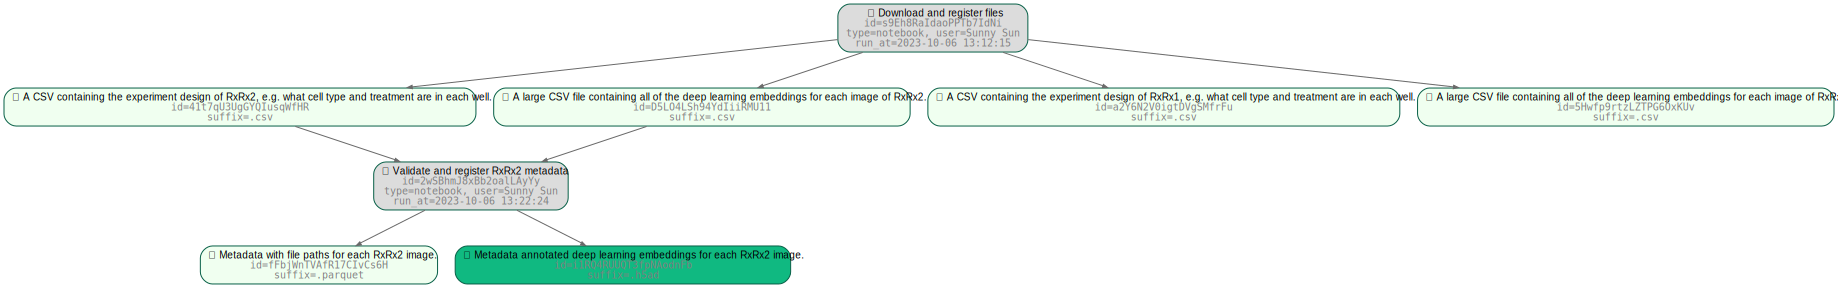

In [52]:
file.view_flow()